In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})

In [240]:
# real correspondence list  (dist: 0 ~ 0.5)
real_corr_list= [[352, 1400], [353, 1401], [390, 1448], [391, 1449], [394, 1452], [395, 1453], [400, 1460], [540, 1618], [543, 1619], [544, 1620], [749, 1819], [940, 2018], [941, 2019], [942, 2020], [943, 2021], [944, 2022], [945, 2023], [946, 2024], [957, 2035], [959, 2037], [960, 2038], [961, 2039], [962, 2040], [963, 2041], [986, 2064], [987, 2065], [988, 2066], [989, 2067], [990, 2068], [991, 2069], [992, 2070], [993, 2071], [994, 2072], [995, 2073], [996, 2074], [1004, 2082], [1148, 2222], [1225, 2303], [1226, 2304], [1231, 2311], [1275, 2355], [1287, 2365], [1289, 2367], [1290, 2368], [1302, 2378], [1303, 2381]]

def indexConvert(corr_idx_list):
    image_idx_order = []
    with open("/home/dongwonshin/Desktop/DBoW2/build/DCGAN_image_order.txt") as fp:
        for l in fp:
            idx = l.split('.')[0].split('/')[-1]
            image_idx_order.append(int(idx))
    
    converted = []
    for corr in corr_idx_list:
        converted.append([image_idx_order[corr[0]],image_idx_order[corr[1]]])
        
    return converted

def corr_mat(mat, threshold):
#     ax = sns.heatmap(mat)
    esti_corr_mat = mat.copy()
    esti_corr_mat[esti_corr_mat<=threshold] = 0
    esti_corr_mat[esti_corr_mat>threshold] = 1
    
#     plt.figure(figsize=(10,10))
#     plt.imshow(esti_corr_mat, cmap = 'hot')
#     plt.show()
    
    positives = []
    negatives = []
    for i in range(esti_corr_mat.shape[0]):
        for j in range(esti_corr_mat.shape[1]):
            if i < j:
                if esti_corr_mat[i,j] == 1:
                    positives.append([i+1,j+1])
                else:
                    negatives.append([i+1,j+1])
                
    
    return indexConvert(positives), indexConvert(negatives)

def showCorrImg(corr_idx_list):
    for corr in corr_idx_list:

        img_i_path = ('/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg' % corr[0])
        img_j_path = ('/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg' % corr[1])

        img_i = mpimg.imread(img_i_path)
        img_j = mpimg.imread(img_j_path)

        merge_img = np.hstack([img_i, img_j])
        plt.figure(figsize=(15,15))
        plt.imshow(merge_img)
        plt.show()
    
def truePositive(positives):
    tp = 0
    for posi in positives:
        if (posi in real_corr_list):
            tp+=1
    return tp

def falsePositive(positives):
    fp = 0
    for posi in positives:
        if (posi not in real_corr_list):
            fp+=1
    return fp

def falseNegative(negatives):
    fn = 0
    for nega in negatives:
        if (nega in real_corr_list):
            fn+=1
    return fn
            
    
def calPrecision(positives):
            
    tp = truePositive(positives)
    fp = falsePositive(positives)
    
    if (tp == 0):
        return 0
    
    precision = tp/(tp+fp)
    
    return precision

def calRecall(positives, negatives):
            
    tp = truePositive(positives)
    fn = falseNegative(negatives)
    
    if (tp == 0):
        return 0
    
    recall = tp/(tp+fn)
    
    return recall

# Ground Truth Results

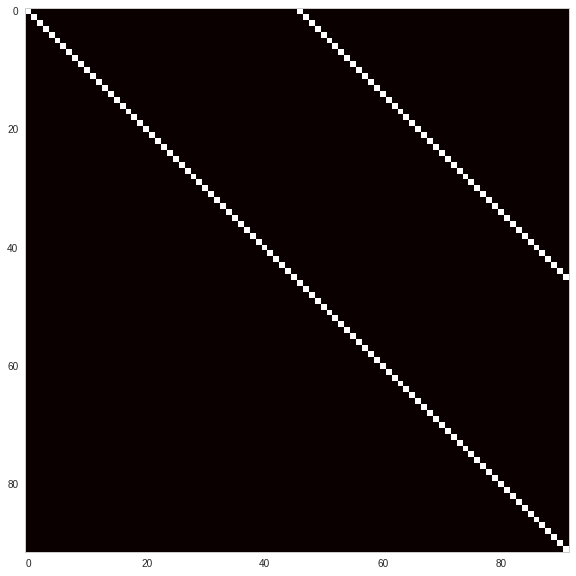

In [283]:
image_idx_order = []
with open("/home/dongwonshin/Desktop/DBoW2/build/DCGAN_image_order.txt") as fp:
    for l in fp:
        idx = l.split('.')[0].split('/')[-1]
        image_idx_order.append(int(idx))

GT_corr_mat = np.zeros((len(image_idx_order),len(image_idx_order)))

for a, i in enumerate(image_idx_order):
    for b, j in enumerate(image_idx_order):
        if i==j:
            GT_corr_mat[a,b] = 1
        if [i,j] in real_corr_list:
            GT_corr_mat[a,b] = 1


plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

# Proposed Method Result

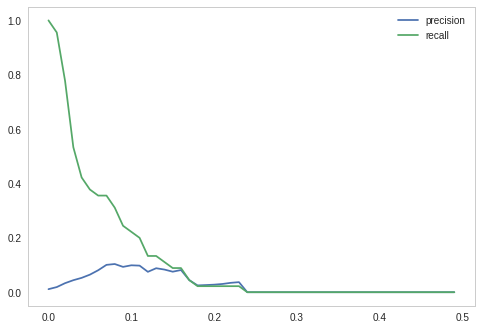

In [254]:
prop_esti_corr_mat = np.matrix(np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt'))

thre_list = []
precision_list = []
recall_list = []
for thre in np.arange(0,0.5,0.01):
    positives, negatives = corr_mat(prop_esti_corr_mat, thre)
    
    precision = calPrecision(positives)
    recall = calRecall(positives, negatives)

    precision_list.append(precision)
    recall_list.append(recall)
    thre_list.append(thre)


plt.plot(thre_list,precision_list, label='precision')
plt.plot(thre_list,recall_list, label='recall')
plt.legend()
plt.show()

# SURF Result

In [287]:
surf_esti_corr_mat = np.matrix(np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/SURF_corr_matrix.txt'))

# thre_list = []
# precision_list = []
# recall_list = []
# for thre in np.arange(0,0.5,0.01):
#     positives, negatives = corr_mat(surf_esti_corr_mat, thre)
    
#     precision = calPrecision(positives)
#     recall = calRecall(positives, negatives)

#     precision_list.append(precision)
#     recall_list.append(recall)
#     thre_list.append(thre)

    
# plt.plot(thre_list,precision_list, label='precision')
# plt.plot(thre_list,recall_list, label='recall')
# plt.legend()
# plt.show()

In [302]:
def PrecisionRecalCurve(GT_corr_mat, esti_corr_mat):

    precision, recall, _ = precision_recall_curve(GT_corr_mat.flatten(), esti_corr_mat.flatten())
    average_precision = average_precision_score(GT_corr_mat.flatten(), esti_corr_mat.flatten())

    # Plot Precision-Recall curve
    plt.clf()
    plt.plot(recall, precision, lw=lw, color='navy', label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
    plt.legend(loc="lower left")
    plt.show()

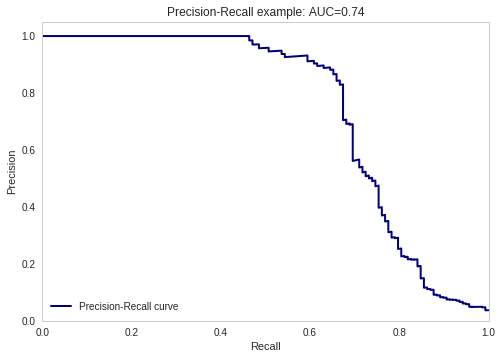

In [310]:
prop_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, prop_esti_corr_mat)

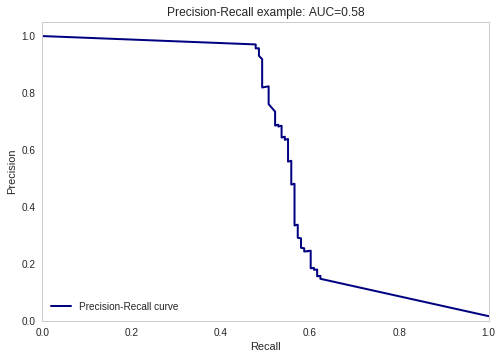

In [311]:
# SURF 파라미터를 30000으로 했을때
surf_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/SURF_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, surf_esti_corr_mat)

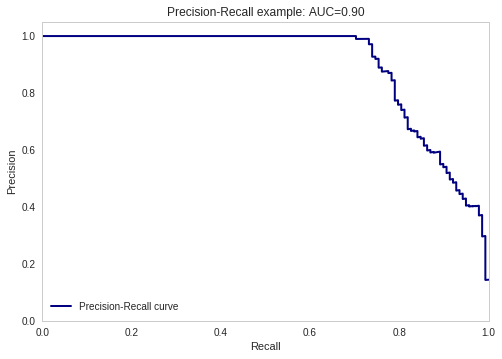

In [312]:
# SURF 파라미터를 300으로 했을때.. 쓔방..
surf_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/SURF_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, surf_esti_corr_mat)